Reference: https://towardsdatascience.com/all-you-need-to-know-to-build-your-first-llm-app-eb982c78ffac

A Step-by-Step Tutorial to Document Loaders, Embeddings, Vector Stores and Prompt Templates

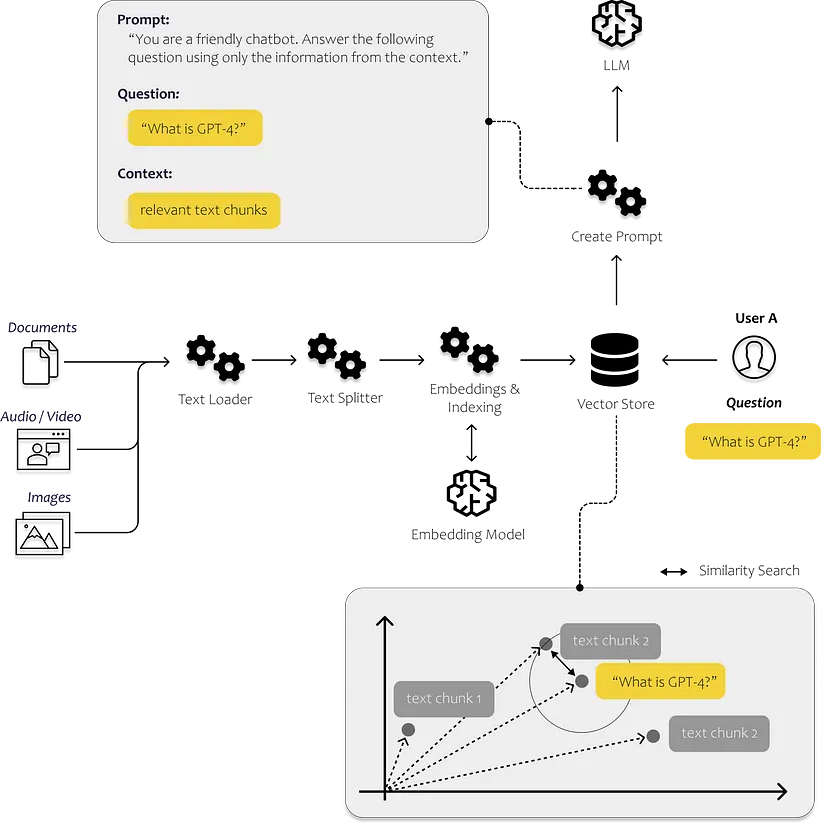

NOTE: This chatbot has 'Context Injection' that makes it applicable to different contexts

# Table of Contents

- Why we need LLMs
- Fine-Tuning vs. Context Injection
- What is LangChain?

Step-by-Step Tutorial

1. Load documents using LangChain
2. Split our Document into Text fragments/Chunks
3. From Text Chunks to Embeddings
4. Define the LLM you want to use
5. Define our Prompt Template
6. Creating a Vector Store

# Why we need LLMs

The evolution of language has brought us humans incredibly far to this day. It enables us to efficiently share knowledge and collaborate in the form we know today. Consequently, most of our collective knowledge continues to be preserved and communicated through unorganized written texts.

Initiatives undertaken over the past two decades to digitize information and processes have often focused on accumulating more and more data in relational databases. This approach enables traditional analytical machine learning algorithms to process and understand our data.

However, despite our extensive efforts to store an increasing amount of data in a structured manner, we are still unable to capture and process the entirety of our knowledge.

<font size="5">About 80% of all data in companies is unstructured, like work descriptions, resumes, emails, text documents, power point slides, voice recordings, videos and social media</font>

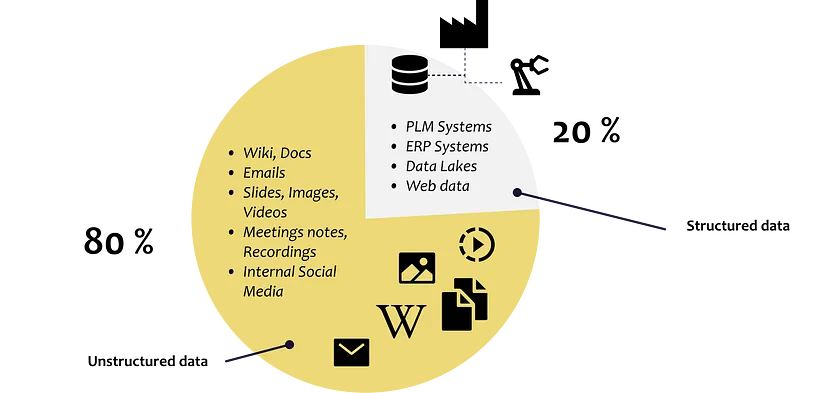

Distribution of data in companies — Image by the author
The development and advancement leading to GPT3.5 signify a major milestone as it empowers us to effectively interpret and analyze diverse datasets, regardless of their structure or lack thereof. Nowadays, we have models that can comprehend and generate various forms of content, including text, images, and audio files.

<font size="5">So how can we leverage their capabilities for our needs and data?</font>

# Fine-Tuning versus Context Injection

In general, there are two fundamentally different approaches to enable large language models to answer questions that the LLM cannot know: <b>Model fine-tuning</b> and <b>context injection</b>

## Fine-Tuning
Fine-tuning refers to training an existing language model with additional data to optimize it for a specific task.

Instead of training a language model from scratch, a pre-trained model such as BERT or LLama is used and then adapted to the needs of a specific task by adding use case specific training data.

A team from Stanford University used the LLM Llama and fine-tuned it by using 50,000 examples of how a user/model interaction could look like. The result is a Chat Bot that interacts with a user and answers queries. This fine-tuning step changed the way the model is interacting with the end user.

### Misconceptions around fine-tuning

Fine-tuning of PLLMs (Pre-trained Language Models) is a way to adjust the model for a specific task, but it doesn’t really allow you to inject your own domain knowledge into the model. This is because the model has already been trained on a massive amount of general language data, and your specific domain data is usually not enough to override what the model has already learned.

So, when you fine-tune the model, it might occasionally provide correct answers, but it will often fail because it heavily relies on the information it learned during pre-training, which might not be accurate or relevant to your specific task. In other words, fine-tuning helps the model adapt to HOW it communicates, but not necessarily WHAT it communicates. (Porsche AG, 2023)

This is where context injection comes into play.

## In-context learning / Context Injection
When using context injection, the original LLM is not modified, instead, the focus is on the prompt itself and the injection of relevant context into the prompt.

So we need to think about how to provide the prompt with the right information. In the figure below, you can see schematically how the whole thing works. We need a process that is able to identify the most relevant data. To do this, we need to enable our computer to compare text snippets with each other.

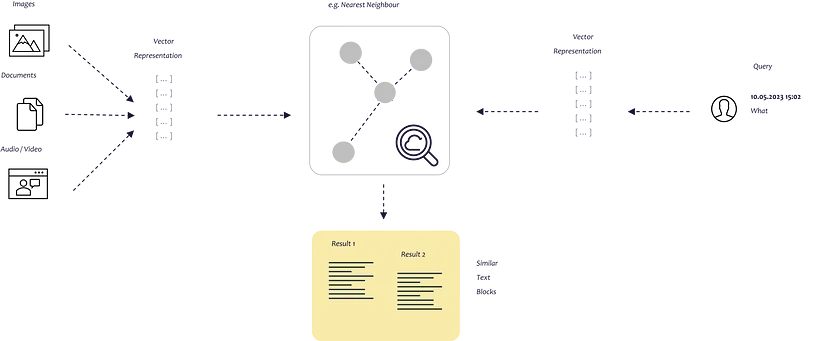

Similarity search in our unstructured data


This can be done with <b>embeddings</b>. Embeddings, translate text into vectors, allowing represent text in a multidimensional embedding space. Points that are closer to each other in space are often used in the same context. To prevent this similarity search from taking forever, vectors of embeddings are stored in a vector database and indexed.

<font size=3>Microsoft is showing us how this could work with Bing Chat. Bing combines the ability of LLMs to understand language and context with the efficiency of traditional web search</font>.

The objective of the article is to demonstrate the process of creating a straightforward solution that allows analysis of our own texts and documents, and then incorporate the insights gained from them into the answers our solution returns to the user.

<font size=3><b>Step by Step tutorial — first LLM App</font></b>

In the following, we want to utilize LLMs to respond to inquiries about our personal data. To accomplish this, I begin by transferring the content of our personal data into a vector database. This step is crucial as it enables us to efficiently search for relevant sections within the text. We will use this information from our data and the LLMs capabilities to interpret text to answer the user’s question.

We can also guide the chatbot to exclusively answer questions based on the data we provide. This way, we can ensure that the chatbot remains focused on the data at hand and provides accurate and relevant responses.

To implement our use case, we will rely heavily on <b>LangChain</b>.

# What is Langchain?

<b>“LangChain is a framework for developing applications powered by language models.” (Langchain, 2023)</b>

Thus, LangChain is a Python framework designed to support the creation of various LLM applications such as chatbots, summary tools, and basically create any tool to leverage the power of LLMs. The library combines various components that are necessary - these components in so-called <i>chains</i>.

The most important modules of Langchain are (Langchain, 2023):

- <b>1.Models</b>: Interfaces to various model types
- <b>2.Prompts</b>: Prompt management, prompt optimization, and prompt serialization
- <b>3.Indexes</b>: Document loaders, text splitters, vector stores — Enable faster and more efficient access to the data
- <b>4.Chains</b>: Chains go beyond a single LLM call, they allow us to set up sequences of calls

The image below shows how and where these components come into play: Load and process own unstructured data using the document loaders and text splitters from the indexes module. The prompts module allows injection of the found content into our prompt template, and finally, we send the prompt to our model using the model's module.

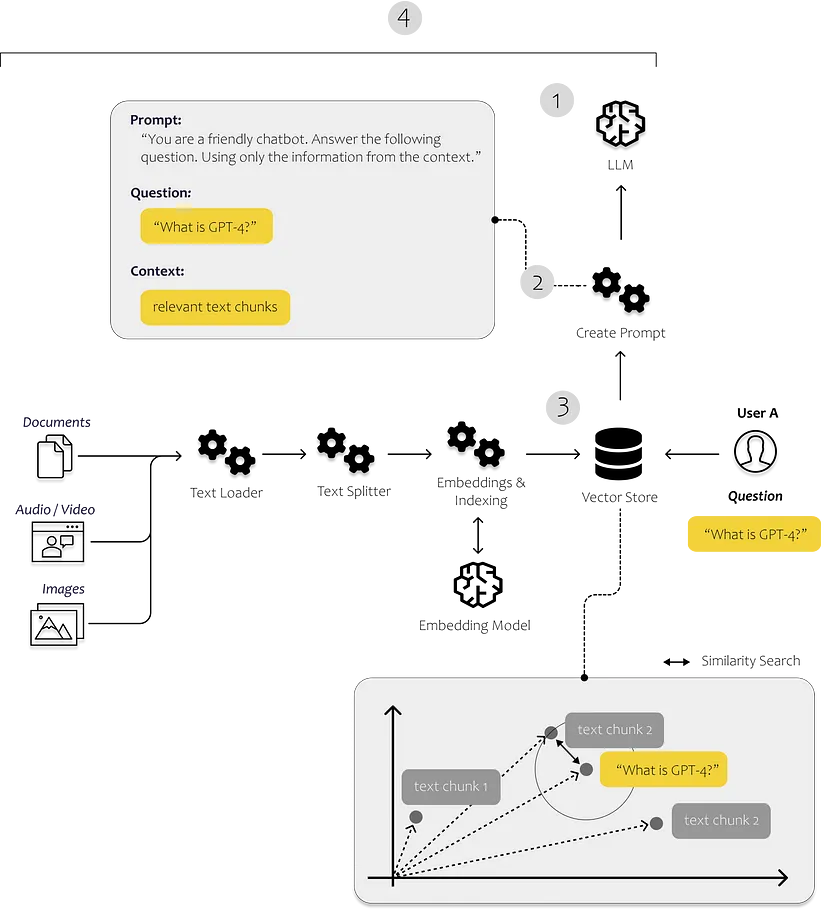

Components you need for your LLM app

- <b>5.Agents</b>: Agents are entities that use LLMs to make choices regarding which actions to take. After taking an action, they observe the outcome of that action and repeat the process until their task is completed.

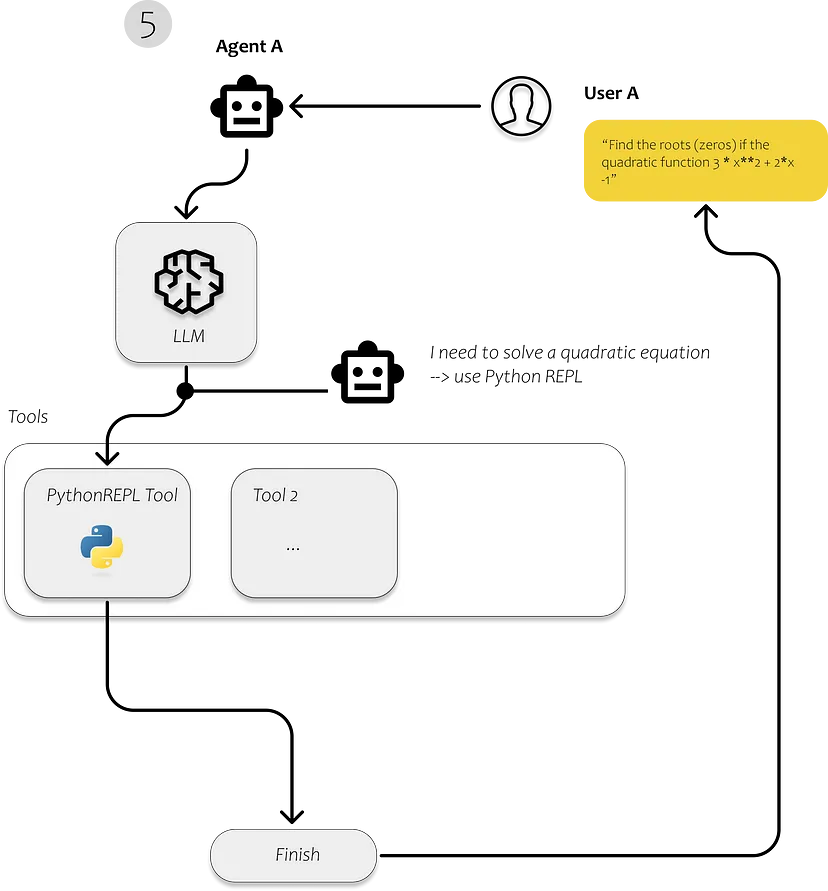

Agents:  decide autonomously how to perform a particular task

We use Langchain in the first step to load documents, analyse them and make them efficiently searchable. After we have indexed the text, it should become much more efficient to recognize text snippets that are relevant for answering the user’s questions.

What we need for our simple application is of course an LLM. We will use GPT3.5 via the OpenAI API. Then we need a vector store that allows us to feed the LLM with our own data. And if we want to perform different actions for different queries, we need an agent that decides what should happen for each query.

Let’s start from the beginning. We first need to import our own documents.

The following section describes what modules are included in LangChain’s Loader Module to load different types of documents from different sources.

# Load Documents using Langchain

LangChain is able to load a number of documents from a wide variety of sources. You can find a list of possible document loaders in the LangChain documentation (https://python.langchain.com/docs/modules/data_connection/document_loaders.html). Among them are loaders for HTML pages, S3 buckets, PDFs, Notion, Google Drive and many more.

For our simple example, we use data that was probably not included in the training data of GPT3.5. I use the Wikipedia article about GPT4 because I assume that GPT3.5 has limited knowledge about GPT4.

For this minimal example, I’m not using any of the LangChain loaders, I’m just scraping the text directly from Wikipedia [License: CC BY-SA 3.0] using BeautifulSoup.

Please note that scraping websites should only be done in accordance with the website’s terms of use and the copyright/license status of the text and data you wish to use.

In [5]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/GPT-4'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

# Find all the text in the page
text = soup.get_text()

# Find the content div
content_div = soup.find('div', {'class': 'mw-parser-output'})

# Remove unwanted elements from div
unwanted_tags = ['sdup', 'span', 'table', 'ul', 'ol']
for tag in unwanted_tags:
    for match in content_div.findAll(tag):
        match.extract()
        
print(f'The cleaned page contents are:\n\n {content_div.get_text()}')

The cleaned page contents are:

 2023 text-generating language model
"ChatGPT-4" redirects here. For other uses, see GPT.




Generative Pre-trained Transformer 4 (GPT-4) is a multimodal large language model created by OpenAI, and the fourth in its series of GPT foundation models.[1] It was initially released on March 14, 2023,[1] and has been made publicly available via the paid chatbot product ChatGPT Plus, and via OpenAI's API.[2]  As a transformer-based model, GPT-4 uses a paradigm where pre-training using both public data and "data licensed from third-party providers" is used to predict the next token. After this step, the model was then fine-tuned with reinforcement learning feedback from humans and AI for human alignment and policy compliance.[3]
Observers reported that the iteration of ChatGPT using GPT-4 was an improvement on the previous iteration based on GPT-3.5, with the caveat that GPT-4 retains some of the problems with earlier revisions.[4] GPT-4 is also capable of taki

# Split our Document into Text fragments/Chunks

Next, divide the text into smaller sections called text chunks. Each text chunk represents a data point in the embedding space, allowing the computer to determine the similarity between these chunks.

The following text snippet is utilizing the text splitter module from langchain. In this particular case, we specify a chunk size of 100 and a chunk overlap of 20. It’s common to use larger text chunks, but you can experiment a bit to find the optimal size for your use case. You just need to remember that every LLM has a token limit (4000 tokes for GPT 3.5). Since we are inserting the text blocks into our prompt, we need to make sure that the entire prompt is no larger than 4000 tokens.

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter as rcts

article_text = content_div.get_text()

text_splitter = rcts(
    chunk_size=100,
    chunk_overlap=20,
    length_function=len
)

texts = text_splitter.create_documents([article_text])

print(texts[0])
print('====================')
print(texts[1])
print('====================')
print(texts[2])

page_content='2023 text-generating language model\n"ChatGPT-4" redirects here. For other uses, see GPT.' metadata={}
page_content='Generative Pre-trained Transformer 4 (GPT-4) is a multimodal large language model created by' metadata={}
page_content='model created by OpenAI, and the fourth in its series of GPT foundation models.[1] It was initially' metadata={}


This splits our entire text as follows:

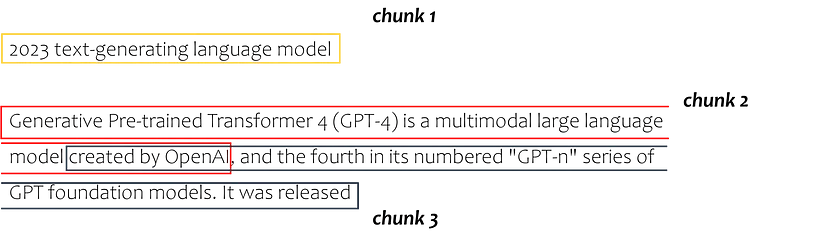

Langchain text spliter

# From Text Chunks to Embeddings

Now we need to make the textual components understandable and comparable to our algorithms. We must find a way to convert human language into digital form, represented by bits and bytes.

The image provides a simple example that may seem obvious to most humans. However, we need to find a way to make the computer understand that the name “Charles” is associated with men rather than women, and if Charles is a man, he is the king and not the queen.

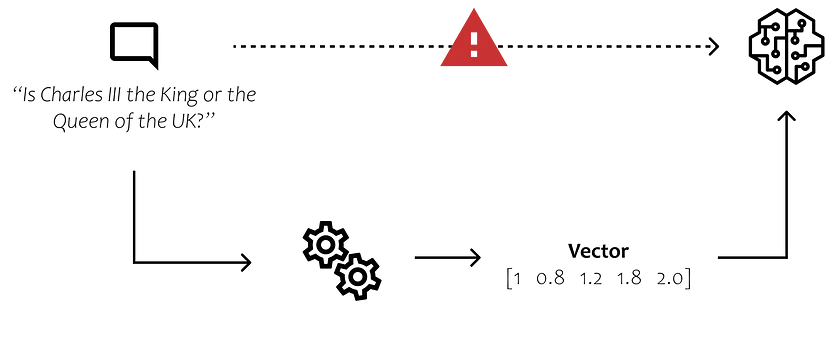

Making language understandable for our computer

Over the last few years, new methods and models have emerged that do just that. What we want is a way to be able to translate the meaning of words into an n-dimensional space, so we are able to compare text chunks with each other and even calculate a measure for the similarity of them.

Embedding models attempt to learn exactly that by analyzing the context in which words are typically used. Since tea, coffee, and breakfast are often used in the same context, they are closer to each other in the n-dimensional space than, for example, tea and pea. Tea and pea sound similar but are rarely used together. (AssemblyAI, 2022)

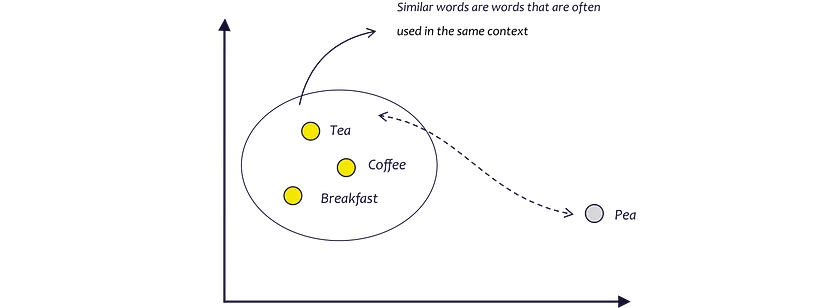

Embeddings analyze the context in which words are used, not the word itself — Image by the author
The embedding models provide us with a vector for each word in the embedding space. Finally, by representing them using vectors, we are able to perform mathematical calculations, such as calculating similarities between words as the distance between data points.


Random english words in a two dimensional embeddings space

To convert text into embeddings, there are several embedding models, e.g. <b><i>Word2Vec</b></i>, <b><i>GloVe</b></i>, <b><i>fastText</b></i> or <b><i>ELMo</b></i>.


<font size=3><b>Embedding Models</font></b>

To capture similarities between words in embeddings, Word2Vec uses a simple neural network. We train this model with large amounts of text data and want to create a model that is able to assign a point in the n-dimensional embedding space to each word and thus describe its meaning in the form of a vector.

For the training, we assign a neuron in the input layer to each unique word in our data set. In the image below, you can see a simple example. In this case, the hidden layer contains only two neurons. Two, because we want to map the words in a two dimensional embedding space. (The existing models are in reality much larger and thus represent the words in higher dimensional spaces — OpenAI’s Ada Embedding Model for example, is using 1536 dimensions) After the training process the individual weights describe the position in the embedding space.

In this example, our dataset consists of a single sentence: “Google is a tech company.” Each word in the sentence serves as an input for the neural network (NN). Consequently, our network has five input neurons, one for each word.

During the training process, we focus on predicting the next word for each input word. When we begin at the start of the sentence, the input neuron corresponding to the word “Google” receives a value of 1, while the remaining neurons receive a value of 0. We aim to train the network to predict the word “is” in this particular scenario.

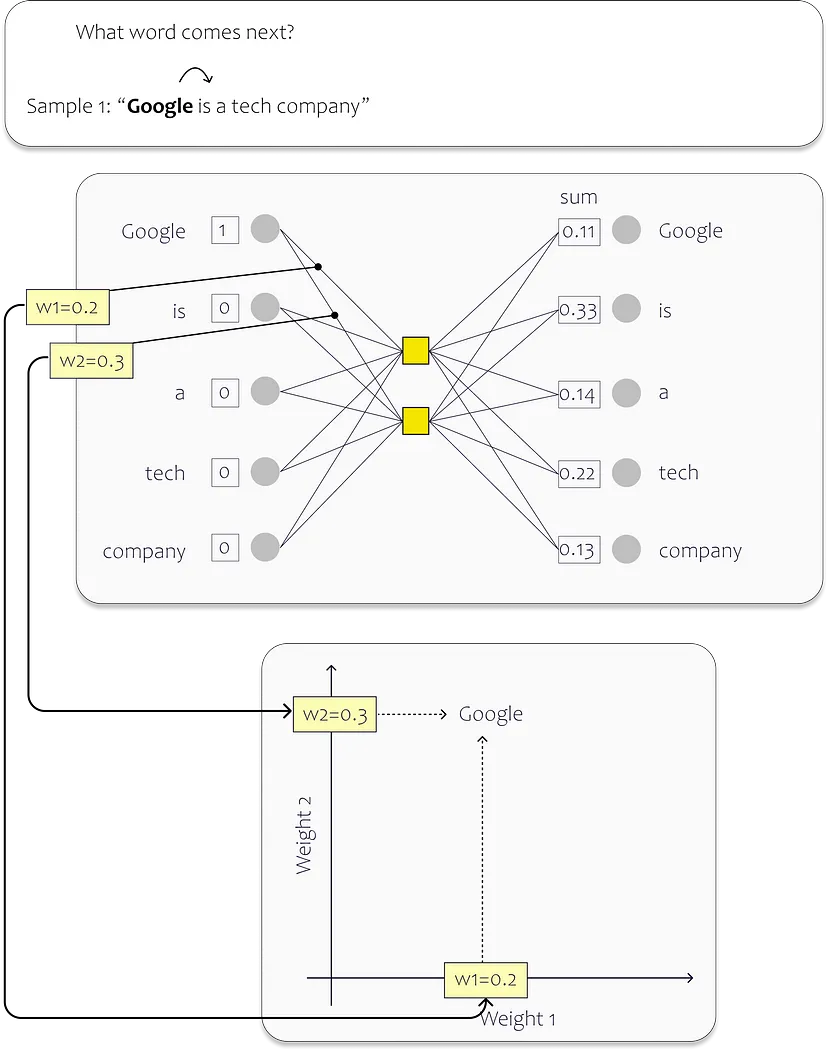

Word2Vec: Learning word embeddings

In reality, there are multiple approaches to learn embedding models, each with its own unique way of predicting outputs during the training process. Two commonly used methods are <b>CBOW (Continuous Bag of Words)</b> and <b>Skip-gram</b>.

In CBOW, we take the surrounding words as input and aim to predict the middle word. Conversely, in Skip-gram, we take the middle word as input and attempt to predict the words occurring on its left and right sides. However, I won’t delve into the intricacies of these methods. Let’s just say that these approaches provide us with embeddings, which are representations that capture the relationships between words by analyzing the context of huge amounts of text data.

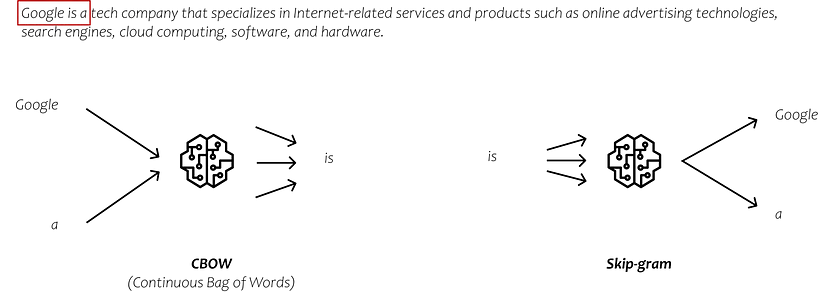

CBOW vs. Skip-gram

If you want to know more about embeddings, there is a wealth of information available on the internet. However, if you prefer a visual and step-by-step guide, you might find it helpful to watch Josh Starmer’s StatQuest on Word Embedding and Word2Vec (https://www.youtube.com/watch?v=viZrOnJclY0&t=204s).

<font size=3><b>Back to embedding models</font></b>

What I just tried to explain using a simple example in a 2-dimensional embedding space also applies to larger models. For instance, the standard Word2Vec vectors have 300 dimensions, while OpenAI’s Ada model has 1536 dimensions. These pretrained vectors allow us to capture the relationships between words and their meanings with such precision that we can perform calculations with them. For example, using these vectors, we can find that France + Berlin — Germany = Paris, and also faster + warm — fast = warmer. (Tazzyman, n.d.)

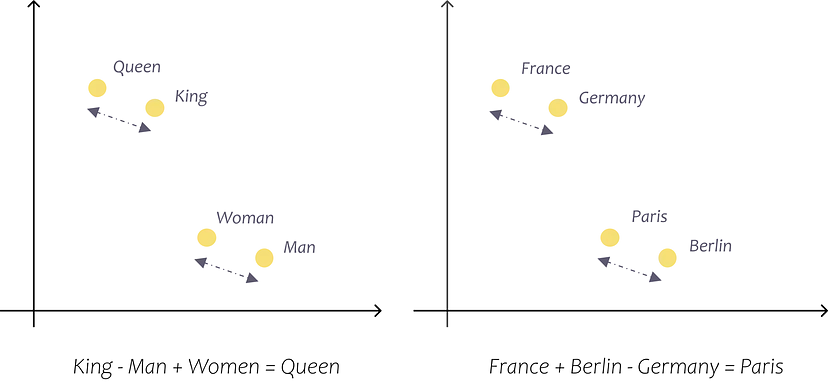

Calculate with embeddings

In the following we want to use the OpenAI API not only to use OpenAI’s LLMs, but also to leverage their Embedding Models.

Note: The difference between Embedding Models and LLMs is that Embedding Models focus on creating vector representations of words or phrases to capture their meanings and relationships, while LLMs are versatile models trained to generate coherent and contextually relevant text based on provided prompts or queries.